<a href="https://colab.research.google.com/github/labudzki/BasicModelsofBiologicalNetworks/blob/main/LDH_kinectic_parameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

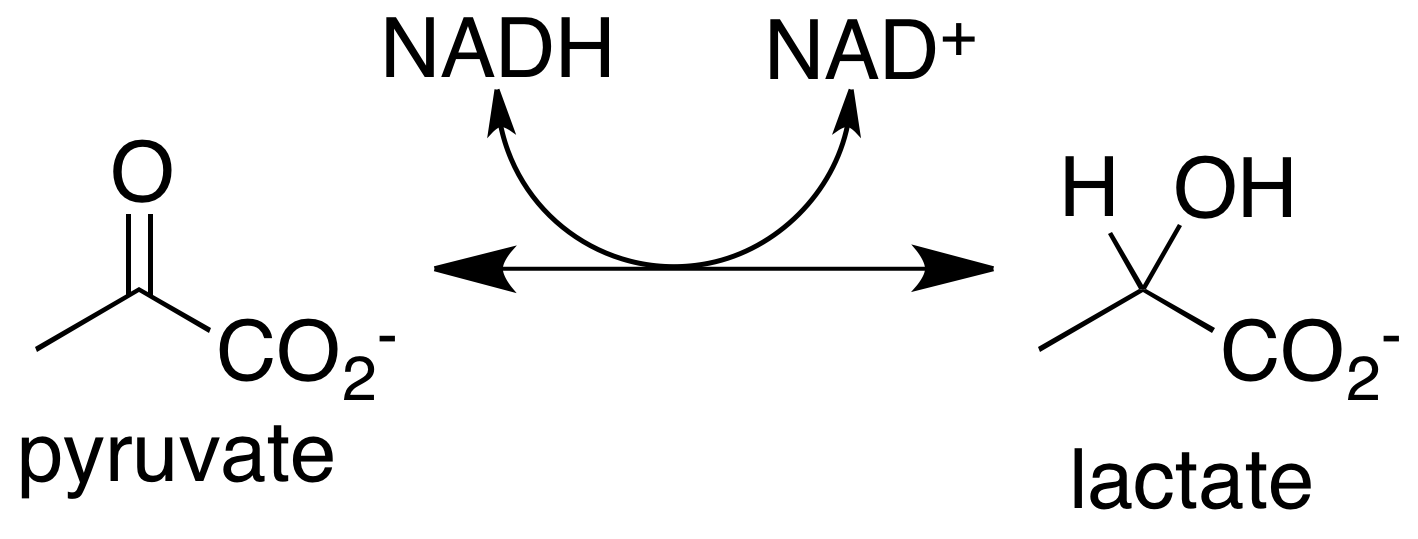


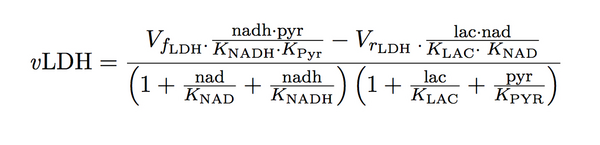



We want to fit the kinictic parameters of this equation to experimental data. 

1. Convince yourself that the rate equation above is correct by writing down the state model of the enzyme, and deriving the equation yourself. Note that $V_{fLDH} = k^+e_t$ and $V_{rLDH} = k^-e_t$

2. What are the kinectic parameters that we want to find?

## The experiments

We will use data generated by the following paper: [Construction and validation of a detailed kinetic model of glycolysis in Plasmodium falciparum](https://febs.onlinelibrary.wiley.com/doi/10.1111/febs.13237)

And the experimental data is avaliable at [https://fairdomhub.org/investigations/56]

1. Download the data file *LDH Kinectic data*. And upload it to Colab.

The following code loads tha data into python:

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

data = pd.read_excel('LDH_Kinetics-SEEK.xls', sheet_name='Data')
data

In [ ]:
data_filtered = data.iloc[1:,:]
data_filtered = data_filtered[['PYR','NADH','NAD','LAC', 'mean (v/V)']].dropna()
data_filtered

#values of the compounds
# function: rate equation with all K's as input and x
#extract optimized values
# make plots

We will now fit this data to the rate equation. Since the experimental data were normalized to $V_{fLDH}$ and $V_{rLDH}$, these are set to 1 (alternatively, you can use the values for $V_{fLDH}$ and $V_{rLDH}$ found on the experiment).

1. Write down the rate equation as a python function.
2. Use the ``curve_fit`` function to find the optimum parameters. Compare the results you have with the ones from the paper.
3. Try to reproduce Figure 12 from the paper.

### Extra
The paper also characterizes many enzymes involved in glycolisis. You can repeat this exercise again for your favourite ones. This should be faster as you now have most of the code done 😀

In [ ]:
def rate_equation(conc, k_nadh, k_nad, k_pyr, k_lac):
  pyr = conc.iloc[:,0]
  nadh = conc.iloc[:,1]
  nad = conc.iloc[:,2]
  lac = conc.iloc[:,3]

  up = nadh*pyr/(k_nadh*k_pyr) - lac*nad/(k_lac*k_nad)
  down_1 = 1 + nad/k_nad + nadh/k_nadh
  down_2 = 1 + lac/k_lac + pyr/k_pyr

  v = up/(down_1*down_2)
  return v

x_data = data_filtered[['PYR','NADH','NAD','LAC']]
y_data = data_filtered['mean (v/V)']

parameters, covariance = curve_fit(rate_equation, x_data, y_data)
parameters

In [ ]:
# Ploting Figure 12A
import seaborn as sns
import matplotlib.pyplot as plt

data_to_plot = data[data['PYR'] == 1][['NADH','v/ControlRate']].astype(float)
data_to_plot

def curve_nadh(nadh, k_nadh, k_nad, k_pyr, k_lac):
  pyr = 1
  nad = 0
  lac = 0

  up = nadh*pyr/(k_nadh*k_pyr) - lac*nad/(k_lac*k_nad)
  down_1 = 1 + nad/k_nad + nadh/k_nadh
  down_2 = 1 + lac/k_lac + pyr/k_pyr

  v = up/(down_1*down_2)
  return v


curve_to_plot = curve_nadh(np.linspace(0,0.8,100),parameters[0],parameters[1],parameters[2],parameters[3])

plt.scatter(data_to_plot['NADH'], data_to_plot['v/ControlRate'], marker='.')
plt.plot(np.linspace(0,0.8,100),curve_to_plot, color='red')